Assignment team-Your work was good in model building and I would recommend you to do proper EDA by using visualizations to get better insights from the data

In [1]:
#import packages
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Read data
df_train = pd.read_csv('SalaryData_Train.csv')
df_test = pd.read_csv('SalaryData_Test.csv')

In [25]:
#Combine the training and testing data

df = pd.concat([df_train,df_test])

In [26]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
df.shape

(45221, 14)

# EDA

In [28]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [29]:
#Number of duplicate values present in the dataset
df.duplicated().sum()

5982

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(39239, 14)

In [32]:
#finding null values
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Visualization

<AxesSubplot:xlabel='sex', ylabel='count'>

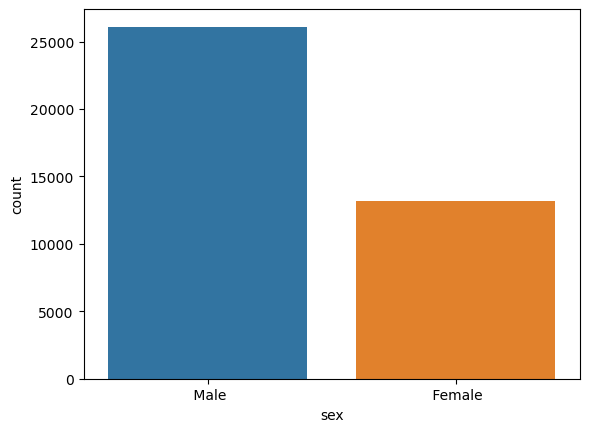

In [11]:
#Plotting count plot for the gender count 
import seaborn as sns
sns.countplot(x='sex', data=df)

<AxesSubplot:>

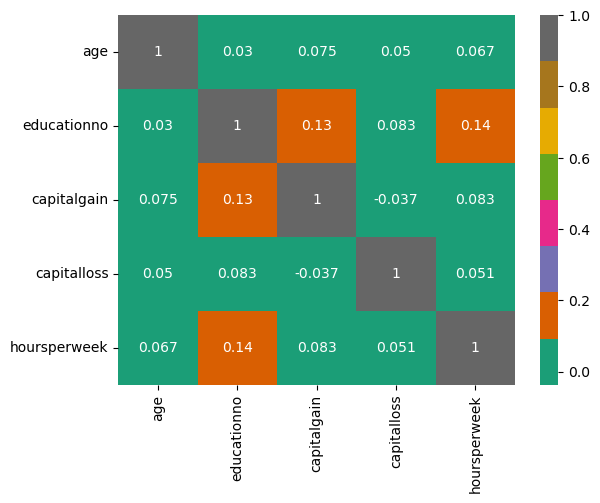

In [12]:
sns.heatmap(data=df.corr(), annot=True, cmap='Dark2')

In [13]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

Text(0.5, 1.0, '')

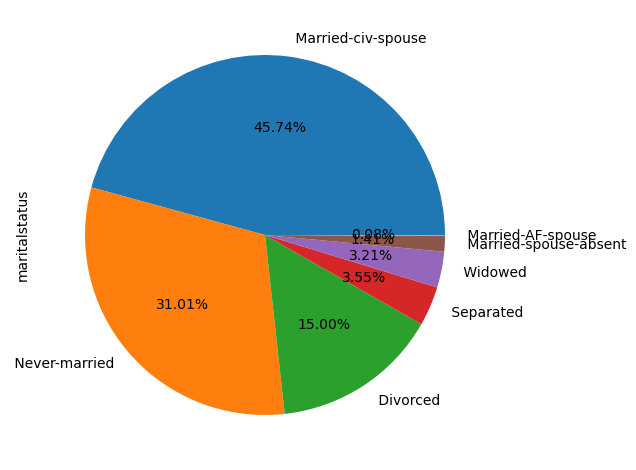

In [42]:
df['maritalstatus'].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.tight_layout()
plt.title('')

In [15]:
#Convert the categorical values into numerical values using labelencoder

cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']

# Encode labels of multiple columns at once

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

# Print head

df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [16]:
#Split the data back into training and testing
df_train = df[:len(df_train)]
df_test = df[len(df_test):]

In [17]:
#split the data into training 
xtrain = df_train.drop('Salary', axis=1)
ytrain = df_train['Salary']

#split the data into testing
xtest = df_test.iloc[:,:-1]
ytest = df_test['Salary']

# Model building

In [18]:
naive = GaussianNB()
naive.fit(xtrain,ytrain)
ypred = naive.predict(xtest)

In [19]:
print(f"Accuracy: {accuracy_score(ytest,ypred)}")

Accuracy: 0.7958559080193557


In [20]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     17991
           1       0.69      0.37      0.48      6188

    accuracy                           0.80     24179
   macro avg       0.75      0.66      0.68     24179
weighted avg       0.78      0.80      0.77     24179

